In [99]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [115]:
#Load Dataset
data=pd.read_csv('./playerdata.csv')
data.head()

,ID,Name,PlayerType,Matches,Bat Not Out,Runs Scored,Highest Score,Batting Average,Balls Faced,Batting Strike Rate,...,Catches,Stumpings,Balls Bowled,Runs Conceded,Wickets,Bowling Average,Economy,Bowling Strike Rate,4W,5W
0,1,Dwayne Bravo,AllRounder,134,38,1483,70,23.17,1156,128.28,...,74,0,2586,3617,147,24.60,8.39,17.59,2,0
1,2,Ravichandran Ashwin,AllRounder,139,17,375,45,10.71,339,110.61,...,32,0,2924,3310,125,26.48,6.79,23.39,1,0
2,3,Sunil Narine,AllRounder,110,13,771,75,17.52,458,168.34,...,17,0,2558,2845,122,23.31,6.67,20.96,6,1
3,4,Ravindra Jadeja,AllRounder,170,48,1927,48,24.08,1572,122.58,...,63,0,2495,3152,108,29.18,7.57,23.10,3,1
4,5,Shane Watson,AllRounder,134,15,3575,117,31.08,2562,139.53,...,38,0,2029,2682,92,29.15,7.93,22.05,1,0


In [83]:
data.describe()

,ID,Matches,Bat0 Not Out,Bat0Runs,Bat0Highest Score,Bat0 Average,Bat0 Balls Faced,Bat0Strike Rate,100,50,...,Catches,Stumpings,BallsBowled,RunsConceded,Wickets,Bowl0Average,Economy,Bowl0Strike Rate,4W,5W
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,92.500000,43.266304,7.032609,654.619565,39.880435,15.575870,494.021739,103.974620,0.211957,3.554348,...,15.695652,1.070652,396.347826,523.739130,19.130435,18.255272,5.507554,13.266467,0.315217,0.054348
std,53.260367,48.839200,9.829643,1168.595611,39.375408,12.231945,874.488784,50.171619,0.798680,7.826485,...,21.898294,4.782757,690.162505,885.953432,33.656158,19.176123,4.334439,13.346976,0.781331,0.250208
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.750000,6.000000,1.000000,15.750000,7.000000,5.000000,13.000000,87.170000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,92.500000,21.500000,3.000000,72.500000,24.000000,14.000000,55.500000,121.170000,0.000000,0.000000,...,6.000000,0.000000,57.000000,82.000000,2.000000,20.180000,7.490000,15.505000,0.000000,0.000000
75%,138.250000,67.500000,9.250000,761.250000,70.500000,26.147500,536.250000,132.602500,0.000000,3.000000,...,22.000000,0.000000,411.750000,612.000000,19.000000,29.330000,8.632500,21.162500,0.000000,0.000000
max,184.000000,190.000000,65.000000,5412.000000,175.000000,55.620000,4112.000000,250.000000,6.000000,44.000000,...,109.000000,38.000000,3124.000000,4072.000000,157.000000,92.000000,18.000000,62.750000,6.000000,2.000000


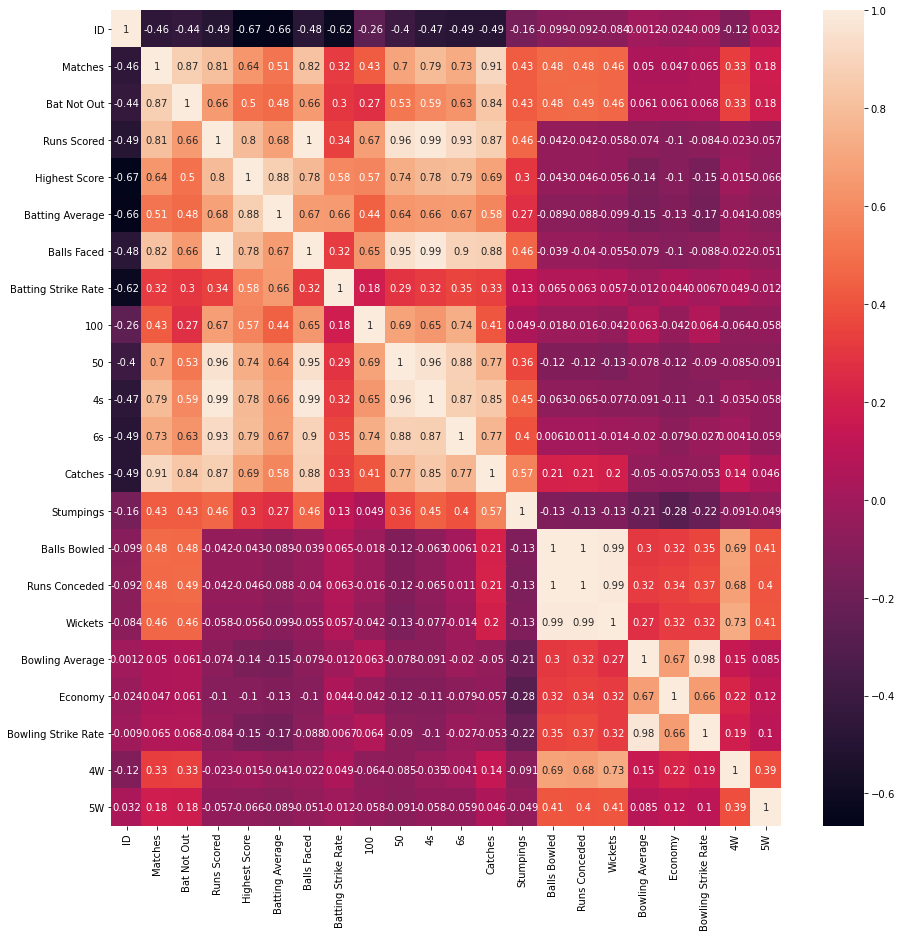

In [116]:
plt.figure(figsize=(15, 15))
corrMatrix=data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

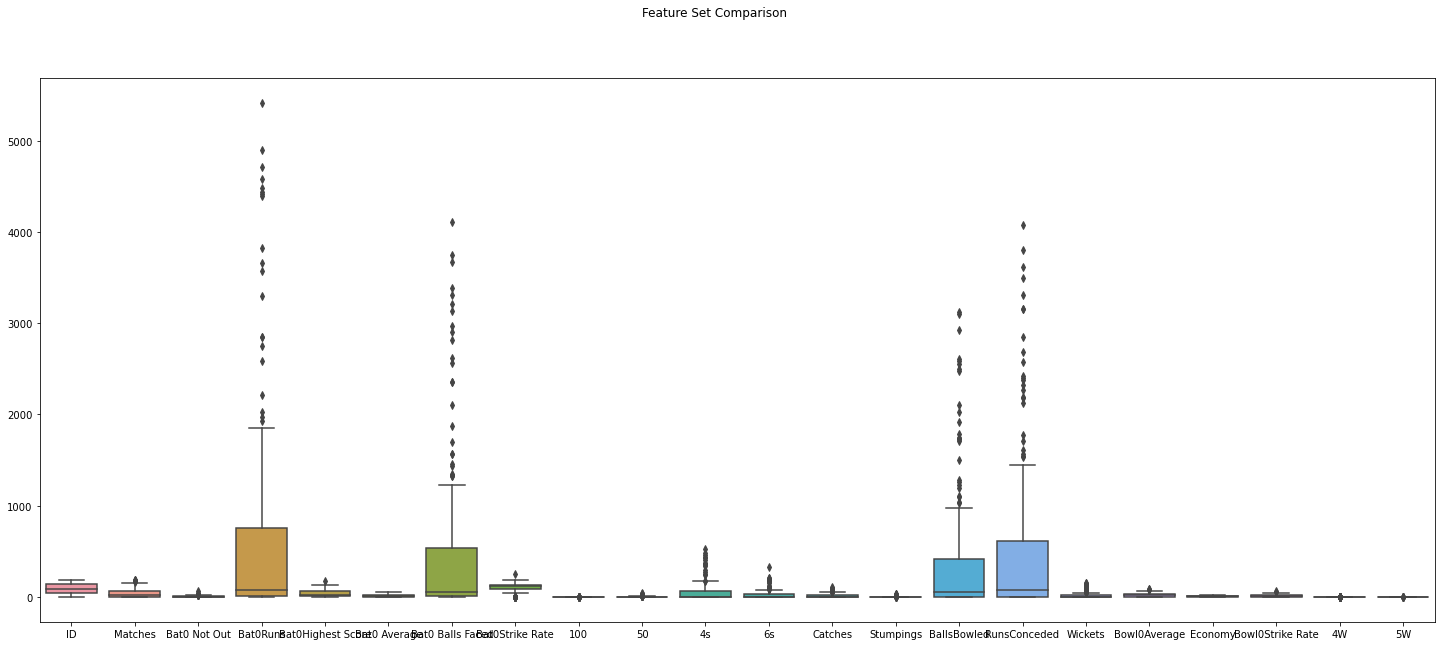

In [96]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(25,10))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=data)
plt.show()

In [52]:
data['Name'] = data['Name'].astype(str)

In [84]:
data=data.drop(columns='Name')


In [85]:
#Create x and y variables
x=data.drop('PlayerType', axis=1).to_numpy()
y=data['PlayerType'].to_numpy()

#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=100)


In [86]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [87]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                    ('Naive Bayes ',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['AllRounder','Batsman','Bowler']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names)) 


Estimator: SVM
[[ 5  1  0]
 [ 3 12  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

  AllRounder       0.62      0.83      0.71         6
     Batsman       0.92      0.80      0.86        15
      Bowler       1.00      1.00      1.00        16

    accuracy                           0.89        37
   macro avg       0.85      0.88      0.86        37
weighted avg       0.91      0.89      0.90        37


Estimator: Naive Bayes 
[[ 4  0  2]
 [ 1  8  6]
 [ 0  0 16]]
              precision    recall  f1-score   support

  AllRounder       0.80      0.67      0.73         6
     Batsman       1.00      0.53      0.70        15
      Bowler       0.67      1.00      0.80        16

    accuracy                           0.76        37
   macro avg       0.82      0.73      0.74        37
weighted avg       0.82      0.76      0.75        37



In [88]:
#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier  

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['AllRounder','Batsman','Bowler']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names)) 


Estimator: DT
[[ 6  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

  AllRounder       1.00      1.00      1.00         6
     Batsman       0.94      1.00      0.97        15
      Bowler       1.00      0.94      0.97        16

    accuracy                           0.97        37
   macro avg       0.98      0.98      0.98        37
weighted avg       0.97      0.97      0.97        37



(array([77., 22., 10.,  5.,  2.,  1.,  0.,  3.,  3.,  2.,  3.,  2.,  2.,
         1.,  2.,  1.,  1.,  0.,  2.,  1.,  1.,  1.,  0.,  0.,  1.,  2.,
         1.,  0.,  0.,  0.,  3.,  1.,  0.,  3.,  1.,  2.,  1.,  1.,  0.,
         0.,  1.,  2.,  1.,  0.,  2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.        ,   41.63076923,   83.26153846,  124.89230769,
         166.52307692,  208.15384615,  249.78461538,  291.41538462,
         333.04615385,  374.67692308,  416.30769231,  457.93846154,
         499.56923077,  541.2       ,  582.83076923,  624.461538

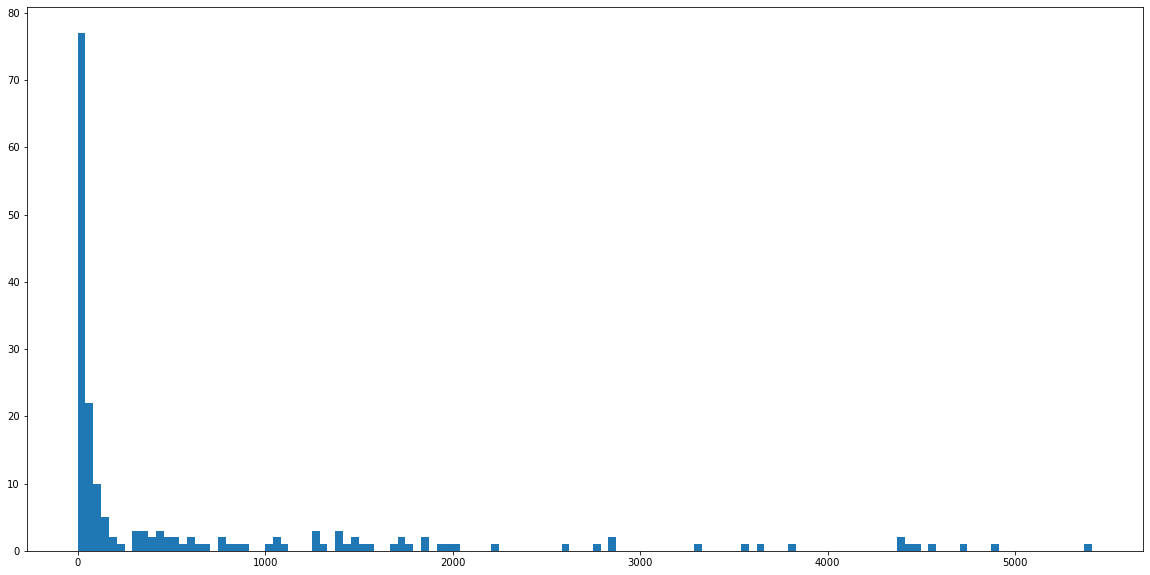

In [91]:
plt.figure(figsize=(20,10))
plt.hist(list(data['Bat0Runs']), bins = data['Bat0Runs'].nunique() )

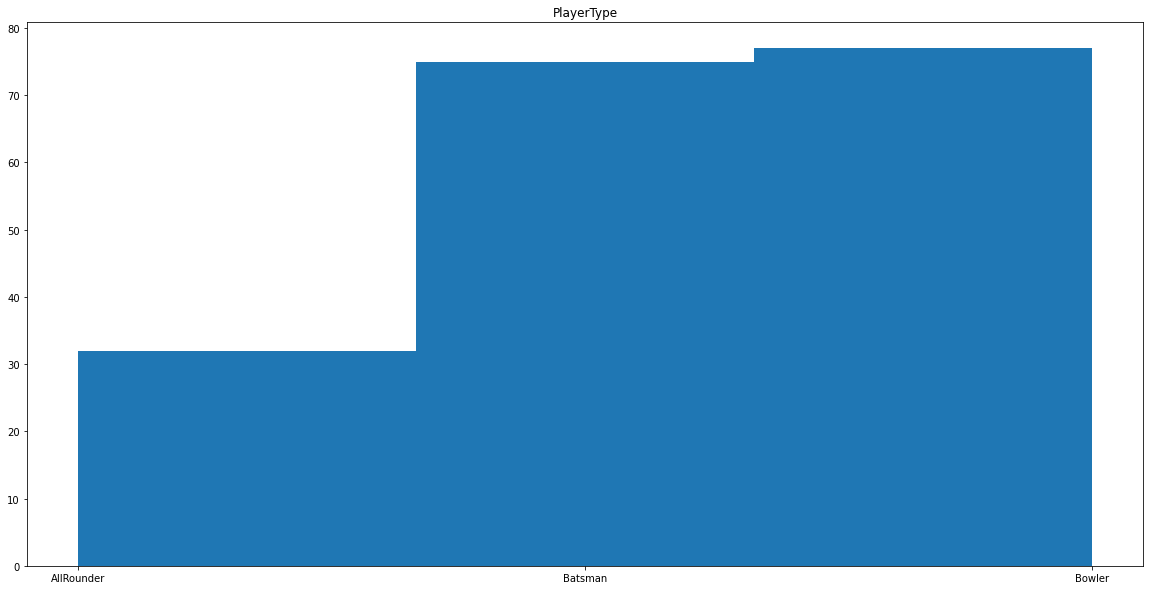

In [92]:
cat_columns = data.select_dtypes(np.object).columns.tolist()
#univariate analysis of categorical variables
for var in cat_columns:
    plt.figure(figsize = (20,10))
    plt.hist(list(data[var]), bins = data[var].nunique() )
    plt.title(var)
    plt.show

In [97]:
data.head()

,ID,PlayerType,Matches,Bat0 Not Out,Bat0Runs,Bat0Highest Score,Bat0 Average,Bat0 Balls Faced,Bat0Strike Rate,100,...,Catches,Stumpings,BallsBowled,RunsConceded,Wickets,Bowl0Average,Economy,Bowl0Strike Rate,4W,5W
0,1,AllRounder,134,38,1483,70,23.17,1156,128.28,0,...,74,0,2586,3617,147,24.60,8.39,17.59,2,0
1,2,AllRounder,139,17,375,45,10.71,339,110.61,0,...,32,0,2924,3310,125,26.48,6.79,23.39,1,0
2,3,AllRounder,110,13,771,75,17.52,458,168.34,0,...,17,0,2558,2845,122,23.31,6.67,20.96,6,1
3,4,AllRounder,170,48,1927,48,24.08,1572,122.58,0,...,63,0,2495,3152,108,29.18,7.57,23.10,3,1
4,5,AllRounder,134,15,3575,117,31.08,2562,139.53,4,...,38,0,2029,2682,92,29.15,7.93,22.05,1,0


In [102]:
pca = PCA(2)

In [106]:
data=data.drop(columns='PlayerType')

In [107]:
df = pca.fit_transform(data)
 
df.shape

(184, 2)

In [111]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 0 0 2 0 0 3 3 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 1 1
 2 2 1 2 3 3 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


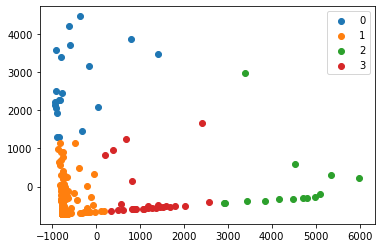

In [112]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

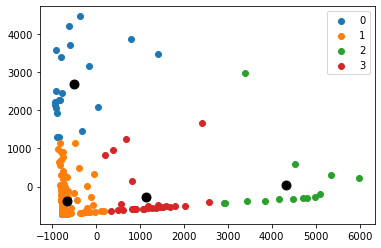

In [114]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()